# Project: Wrangling and Analyze Data

<h1 style = "color:Maroon "> Data Gathering </h1>
<p>In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
</p>
<p style = "color: MidnightBlue ; font-weight: bold;">
 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
</p>

In [1]:
from pyspark.sql import functions as F 
import pandas as pd

In [2]:
import pandas as pd
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<p style = "color: MidnightBlue ;font-weight: bold;">
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
</p>

In [3]:
import requests
import os
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    

In [4]:
df_image = pd.read_csv('image-predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<p style = "color: MidnightBlue; font-weight: bold;">
3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
<p/>

In [5]:
import requests
url = 'https://twitter.com/dog_rates/status/892177421306343426/photo/1'
response1 = requests.get(url)
# Work with HTML in memory

from bs4 import BeautifulSoup
soup = BeautifulSoup(response1.content, 'lxml')
retweets = soup.find('span', class_='css-901oao css-16my406 r-poiln3 r-1b43r93 r-b88u0q r-1cwl3u0 r-bcqeeo r-qvutc0')
retweets
#ondemand.emoji.sv

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

2356

In [7]:
df_web_tweet = pd.read_json('tweet-json.txt', lines=True, orient='columns')
df_web_tweet.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<h1 style = "color:Maroon "> Assessing Data </h1>
<p>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.


**Note:** pay attention to the following key points when you access the data.

</br>
<li> 
You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
</li>
<li> 
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
</li>
<li> 
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
</li>
<li> 
You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.
</li>
</p>


<p style = "color: MidnightBlue ; font-weight: bold;">
 1. The WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
</p>

In [8]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df_twitter[df_twitter.tweet_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
df_twitter[df_twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [11]:
df_twitter[df_twitter["expanded_urls"].str.contains(",") ==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
17,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,None,None,None,None
18,888554962724278272,NaN,NaN,2017-07-22 00:23:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphus. He's powering up. Attempting ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,None,None,None,None
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
20,888078434458587136,NaN,NaN,2017-07-20 16:49:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [12]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<h5 style = "color: MidnightBlue ;font-weight: bold;">
Quality issues
</h5>

<ol>
  <li style = "color: Navy ; bottom: 30px;">Data Types</li>
    Data Format for timestamp column in df_twitter table ("twitter-archive-enhanced.csv") must be timestamp format instead of string format
  <br/>  

  <li style = "color: Navy ; bottom: 30px;">Data Types</li>
    Data Format for tweet_id column in df_twitter table ("twitter-archive-enhanced.csv") must be object format instead of int64 format
  <br/>  
    
  <li style = "color: Navy ;bottom: 30px;">Missing or inaccurate data</li>
    Value data of in_reply_to_status_id, in_reply_to_user_id column in df_twitter table ("twitter-archive-enhanced.csv") have 96,67% null
  <br/>
    
  <li style = "color: Navy ; bottom: 30px;">Inaccurate data</li>
    Value data of "name" column in df_twitter table ("twitter-archive-enhanced.csv") have "a", "quite","an", this are not name
  <br/>
  
  <li style = "color: Navy ; bottom: 30px;">Inaccurate data</li>
    Value data of "source" column in df_twitter table ("twitter-archive-enhanced.csv") have ".. href = "http://"". It must be clean
  <br/>
  
  <li style = "color: Navy ; bottom: 30px;">Inaccurate data</li>
    Name of "floofer" column in df_twitter table ("twitter-archive-enhanced.csv") should be "floof"
  <br/>
  
    
  <li style = "color: Navy ; bottom: 30px;"> Inaccurate data</li>
   Value of doggo col is none and doggo, it must be true and false
   <br/>
   The same with floofer ,pupper ,puppo column in df_twitter table ("twitter-archive-enhanced.csv")
            
  <br/>

  
   <li style = "color: Navy ; bottom: 30px;"> Inaccurate data</li> 
     Value data of "expanded_urls" column in df_twitter table ("twitter-archive-enhanced.csv") have repeated value "https://" (ex tweet_id = 863062471531167744).
  <br/>  
  

  
</ol> 

<h5 style = "color: MidnightBlue ;font-weight: bold;">
Tidiness issues
</h5>



<ol>

   <li style = "color: Navy ; bottom: 30px;"> Each observation forms a row</li>
   4 columns doggo, floofer ,pupper ,puppo  in df_twitter table ("twitter-archive-enhanced.csv") need to be merged into a single column           
  <br/>
  

            
  <br/>
</ol> 

<p style = "color: MidnightBlue; font-weight: bold;">
2. Twitter json (tweet_json.txt)
<p/>

In [13]:
df_web_tweet = pd.read_json('tweet-json.txt', lines=True, orient='columns')
df_web_tweet

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [14]:
df_web_tweet[df_web_tweet.id.isnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [15]:
df_web_tweet[df_web_tweet.id.duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [16]:
df_web_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

<h5 style = "color: MidnightBlue ;font-weight: bold;">
Quality issues
</h5>

<ol> 
  <li style = "color: Navy ; bottom: 30px;">Data Types</li>
    Data Format for id column in df_web_tweet table ("tweet-json.txt") must be object format instead of int64 format
  <br/>  
    
  <li style = "color: Navy ;bottom: 30px;">Missing or inaccurate data</li>
    Value data of contributors, coordinates, geo,place  column have 99-100% null in df_web_tweet table ("tweet-json.txt")
  <br/>
  
  <li style = "color: Navy ; bottom: 30px;">Inaccurate data</li>
    Value data of "source" column in df_web_tweet table ("tweet-json.txt") have ".. href = "http://"". It must be clean
  <br/>
  
</ol> 

<p style = "color: MidnightBlue ;font-weight: bold;">
3. Tweet image prediction (image_predictions.tsv)
</p>

In [17]:
import pandas as pd
df_image = pd.read_csv('image-predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
df_image[df_image.tweet_id.isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
df_image[df_image.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [20]:
df_image[df_image.jpg_url.duplicated()].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [21]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<h5 style = "color: MidnightBlue ;font-weight: bold;">
Quality issues
</h5>

<ol>
  <li style = "color: Navy ;bottom: 30px;">Duplicated data</li>
    Value data of jpg_url column in df_image table ("image-predictions.tsv") have 66 rows duplicated
  <br/>
  
  
  <li style = "color: Navy ; bottom: 30px;">Human error - typo</li>
    Value data of p1, p2, p3 column in df_image table ("image-predictions.tsv") have the first character is capital, but value: ice_bear,laptop.. are not capital
  <br/>

  <li style = "color: Navy ; bottom: 30px;">Data type</li>
    Data Format for id column in df_clean_image table ("image-predictions.tsv") must be object format instead of int64 format
  <br/>

  
</ol> 

<h1 style = "color:Maroon "> Cleaning Data </h1>
<p>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

</p>

<h5 style = "color: MidnightBlue ;font-weight: bold;">
Quality issues
</h5>

<ol>
   <li style = "color: Navy ; bottom: 30px;">Issue 1: Data Types</li>
    Data Format for timestamp column in df_twitter table ("twitter-archive-enhanced.csv") must be timestamp format instead of string format
  <br/>  
   

  <li style = "color: Navy ; bottom: 30px;">Issue 2: Data Types</li>
    Data Format for tweet_id column in df_twitter table ("twitter-archive-enhanced.csv") must be object format instead of int64 format
  <br/>
  Data Format for id column in df_web_tweet table ("tweet-json.txt") must be object format instead of int64 format
  <br/>
  Data Format for id column in df_clean_image table ("image-predictions.tsv") must be object format instead of int64 format
    
  <li style = "color: Navy ;bottom: 30px;">Issue 3: Missing or inaccurate data</li>
    Value data of in_reply_to_status_id, in_reply_to_user_id column in df_twitter table ("twitter-archive-enhanced.csv") have 96,67% null
  <br/>
  Value data of contributors, coordinates, geo,place  column have 99-100% null in df_web_tweet table ("tweet-json.txt")
    
  <li style = "color: Navy ; bottom: 30px;">Issue 4: Inaccurate data</li>
    Value data of "name" column in df_twitter table ("twitter-archive-enhanced.csv") have "a", "quite","an", this are not name
  <br/>
  
  <li style = "color: Navy ; bottom: 30px;">Issue 5: Inaccurate data</li>
    Value data of "source" column in df_twitter table ("twitter-archive-enhanced.csv") have ".. href = "http://"". It must just be clean
  <br/>
  Value data of "source" column in df_web_tweet table ("tweet-json.txt") have ".. href = "http://"". It must just "http://"
  <br/>
  
  
  <li style = "color: Navy ; bottom: 30px;">Issue 6: Human error - typo</li>
    Value data of p1, p2, p3 column in df_image table ("image-predictions.tsv") have the first character is capital, but value: ice_bear,laptop.. are not capital
  <br/>
  
  <li style = "color: Navy ; bottom: 30px;">Issue 7: Inaccurate data</li>
    Name of "floofer" column in df_twitter table ("twitter-archive-enhanced.csv") should be "floof"
  <br/>
  
  <li style = "color: Navy ; bottom: 30px;">Issue 8: Inaccurate data</li> 
     Value data of "expanded_urls" column in df_twitter table ("twitter-archive-enhanced.csv") have repeated value "https://" (ex tweet_id = 863062471531167744).
  <br/>  
  
  
</ol> 



<h5 style = "color: MidnightBlue ;font-weight: bold;">
Tidiness issues
</h5>

<ol>

   <li style = "color: Navy ; bottom: 30px;"> Issue 9: Each observation forms a row</li>
   4 columns doggo, floofer ,pupper ,puppo  in df_twitter table ("twitter-archive-enhanced.csv") need to be merged into a single column           
  <br/>
    
  
   <li style = "color: Navy ; bottom: 30px;">Issue 10: Merge 3 dataset</li>
    Need to merge 3 dataset: df_twitter table ("twitter-archive-enhanced.csv"), df_web_tweet table ("tweet-json.txt") and df_image table ("image-predictions.tsv") together
  <br/>
</ol> 

In [22]:
# Make copies of original pieces of data
df_clean_twitter = df_twitter.copy()
df_clean_image = df_image.copy()
df_clean_web_tweet = df_web_tweet.copy()

<h3 style = "color: MidnightBlue ;font-weight: bold;" > Issue #1: Data Types
</h3>
Data Format for timestamp column in df_twitter table ("twitter-archive-enhanced.csv") must be timestamp format instead of string format

<h4 style = "color: OliveDrab ;font-weight: bold;"> Define:
</h4>
<p>
Change format timestamp col to timestamp format    
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Code
</h4>

In [23]:
# Change type of column timestamp
df_clean_twitter.timestamp = pd.to_datetime(df_clean_twitter.timestamp)

<h4 style = "color: OliveDrab ;font-weight: bold;"> Test
</h4>

In [24]:
df_clean_twitter.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [25]:
df_clean_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<h3 style = "color: MidnightBlue ;font-weight: bold;" > Issue #2: Data Types
</h3>
<p>
Data Format for tweet_id column in df_twitter table ("twitter-archive-enhanced.csv") must be object format instead of int64 format
<br/>
Data Format for id column in df_web_tweet table ("tweet-json.txt") must be object format instead of int64 format
<br/>
Data Format for id column in df_clean_image table ("df_clean_image") must be object format instead of int64 format
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Define:
</h4>
<p>
Change format tweet_id col of df_twitter to object
<br/>
Change format id col of df_web_tweet to object  
<br/>
Change format id col of df_clean_image to object  
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Code
</h4>

In [26]:
# Change type of column tweet_id and id
df_clean_twitter.tweet_id = df_clean_twitter.tweet_id.astype('str')
df_clean_web_tweet.id = df_clean_web_tweet.id.astype('str')
df_clean_image.tweet_id = df_clean_image.tweet_id.astype('str')

<h4 style = "color: OliveDrab ;font-weight: bold;"> Test
</h4>

In [27]:
#check
df_clean_twitter.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [28]:
#check
df_clean_web_tweet.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                       object
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

<h3 style = "color: MidnightBlue ;font-weight: bold;" > Issue #3: Missing or inaccurate data
</h3>
<p>
Value data of in_reply_to_status_id, in_reply_to_user_id column in df_twitter table ("twitter-archive-enhanced.csv") have 96,67% null
<br/>
Value data of contributors, coordinates, geo,place column have 99-100% null in df_web_tweet table ("tweet-json.txt")
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Define:
</h4>
<p>
Delete col in_reply_to_status_id, in_reply_to_user_id of  df_twitter
<br/>
Delete col contributors, coordinates, geo,place of  df_web_tweet 
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Code
</h4>

In [29]:
#  Remove rows that have non-empty 
df_clean_twitter = df_clean_twitter[df_clean_twitter.retweeted_status_id.isnull()]
df_clean_twitter = df_clean_twitter[df_clean_twitter.retweeted_status_user_id.isnull()]
df_clean_twitter = df_clean_twitter[df_clean_twitter.retweeted_status_timestamp.isnull()]

In [30]:
# Drop cols
df_clean_twitter = df_clean_twitter.drop(columns= ["in_reply_to_status_id", "in_reply_to_user_id","retweeted_status_id",
                                                   "retweeted_status_user_id","retweeted_status_id",
                                                   "retweeted_status_user_id","retweeted_status_timestamp"
                                                  ])
df_clean_web_tweet = df_clean_web_tweet.drop(columns= ["contributors", "coordinates", "geo","place", 
                                                       "in_reply_to_status_id", "in_reply_to_user_id",
                                                       "in_reply_to_screen_name","in_reply_to_status_id_str",
                                                       "in_reply_to_user_id_str","quoted_status","quoted_status_id",
                                                       "quoted_status_id_str","retweeted_status",
                                                       "possibly_sensitive","possibly_sensitive_appealable"
                                                      ])

<h4 style = "color: OliveDrab ;font-weight: bold;"> Test
</h4>

In [31]:
#check
df_clean_twitter.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [32]:
#check
df_clean_web_tweet.head(1)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,retweet_count,retweeted,source,truncated,user
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336192,False,en,8853,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<h3 style = "color: MidnightBlue ;font-weight: bold;" > Issue #4: Inaccurate data
</h3>
<p>
Value data of "name" column in df_twitter table ("twitter-archive-enhanced.csv") have "a", "quite","an", this are not name
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Define:
</h4>
<p>
Replace "a", "quite","an" value bt None
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Code
</h4>

In [33]:
df_clean_twitter.name.replace('a', 'None', inplace=True)
df_clean_twitter.name.replace('quite', 'None', inplace=True)
df_clean_twitter.name.replace('an', 'None', inplace=True)

<h4 style = "color: OliveDrab ;font-weight: bold;"> Test
</h4>

In [34]:
df_clean_twitter[df_clean_twitter.name == "a"].name.value_counts()

Series([], Name: name, dtype: int64)

In [35]:
df_clean_twitter[df_clean_twitter.name == "quite"].name.value_counts()

Series([], Name: name, dtype: int64)

In [36]:
df_clean_twitter[df_clean_twitter.name == "an"].name.value_counts()

Series([], Name: name, dtype: int64)

<h3 style = "color: MidnightBlue ;font-weight: bold;" > Issue #5: Inaccurate data
</h3>
<p>
Value data of "source" column in df_twitter table ("twitter-archive-enhanced.csv") have ".. href = "http://"". It must just "http://"
<br/>
Value data of "source" column in df_web_tweet table ("tweet-json.txt") have ".. href = "http://"". It must just "http://"
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Define:
</h4>
<p>
Clean col source in df_twitter 
<br/>
Clean col source in df_web_tweet  
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Code
</h4>

In [37]:
df_clean_twitter.source = df_clean_twitter.source.str.extract('>(.*)<')
df_clean_web_tweet.source = df_clean_web_tweet.source.str.extract('>(.*)<')

<h4 style = "color: OliveDrab ;font-weight: bold;"> Test
</h4>

In [38]:
#check
df_clean_twitter.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [39]:
#check
df_clean_web_tweet.head(1)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,retweet_count,retweeted,source,truncated,user
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336192,False,en,8853,False,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<h3 style = "color: MidnightBlue ;font-weight: bold;" > Issue #6: Human error - typo
</h3>
<p>
Value data of p1, p2, p3 column in df_image table ("image-predictions.tsv") have the first character is capital, but value: ice_bear,laptop.. are not capital
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Define:
</h4>
<p>
Change value of p1, p2, p3 to lower
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Code
</h4>

In [40]:
#to lower 
df_clean_image.p1 = df_clean_image.p1.str.lower()
df_clean_image.p2 = df_clean_image.p2.str.lower()
df_clean_image.p3 = df_clean_image.p3.str.lower()

<h4 style = "color: OliveDrab ;font-weight: bold;"> Test
</h4>

In [41]:
df_clean_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


<h3 style = "color: MidnightBlue ;font-weight: bold;" > Issue #7: Inaccurate data
</h3>
<p>
Name of "floofer" column in df_twitter table ("twitter-archive-enhanced.csv") should be "floof"
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Define:
</h4>
<p>
Change name of col  "floofer" to  "floof"
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Code
</h4>

In [42]:
#to lower 
df_clean_twitter = df_clean_twitter.rename(columns={"floofer":"floof"})

<h4 style = "color: OliveDrab ;font-weight: bold;"> Test
</h4>

In [43]:
df_clean_twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<h3 style = "color: MidnightBlue ;font-weight: bold;" > Issue #8: Inaccurate data
</h3>
<p>

Value data of "expanded_urls" column in df_twitter table ("twitter-archive-enhanced.csv") have repeated value "https://" (ex tweet_id = 863062471531167744).
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Define:
</h4>
<p>
delete all repete in expanded_urls col of df_twitter
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Code
</h4>

In [44]:
df_clean_twitter.expanded_urls  = df_clean_twitter.expanded_urls.str.split(r",", expand=True)[0]

<h4 style = "color: OliveDrab ;font-weight: bold;"> Test
</h4>

In [45]:
df_clean_twitter[df_clean_twitter["expanded_urls"].str.contains(",") ==True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo


In [46]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floof                 2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


<h3 style = "color: MidnightBlue ;font-weight: bold;" > Issue #9: Each observation forms a row
</h3>
<p>
 4 columns doggo, floofer ,pupper ,puppo in df_twitter table ("twitter-archive-enhanced.csv") need to be merged into a single column
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Define:
</h4>
<p>   
create dog_stage column from 4: doggo, floof, pupper, puppo 
<br/>
Delete doggo, floof, pupper, puppo cols
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Code
</h4>

In [47]:
df_clean_twitter.doggo.value_counts()

None     2088
doggo      87
Name: doggo, dtype: int64

In [48]:
df_clean_twitter.floof.value_counts()

None       2165
floofer      10
Name: floof, dtype: int64

In [49]:
df_clean_twitter.pupper.value_counts()

None      1941
pupper     234
Name: pupper, dtype: int64

In [50]:
df_clean_twitter.puppo.value_counts()

None     2150
puppo      25
Name: puppo, dtype: int64

In [51]:
#Replace value None by null
df_clean_twitter.doggo.replace('None', '', inplace=True)
df_clean_twitter.floof.replace('None', '', inplace=True)
df_clean_twitter.pupper.replace('None', '', inplace=True)
df_clean_twitter.puppo.replace('None', '', inplace=True)

In [52]:
df_clean_twitter['dog_stage'] = df_clean_twitter.doggo + df_clean_twitter.floof + df_clean_twitter.pupper + df_clean_twitter.puppo

In [53]:
#Drop cols
df_clean_twitter = df_clean_twitter.drop(columns=['doggo', 'floof', 'pupper', 'puppo'])

In [54]:
df_clean_twitter.dog_stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [55]:
df_clean_twitter.dog_stage.replace('doggopupper', 'doggo,pupper', inplace=True)
df_clean_twitter.dog_stage.replace('doggopuppo', 'doggo,puppo', inplace=True)
df_clean_twitter.dog_stage.replace('doggofloofer', 'doggo,floofer', inplace=True)

<h4 style = "color: OliveDrab ;font-weight: bold;"> Test
</h4>

In [56]:
df_clean_twitter.dog_stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

<h3 style = "color: MidnightBlue ;font-weight: bold;" > Issue #10: Merge 3 dataset
</h3>
<p>

4 columns doggo, floofer ,pupper ,puppo in df_twitter table ("twitter-archive-enhanced.csv") need to be merged into a single column
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Define:
</h4>
<p>
Merge 3 dataset df_twitter table ("twitter-archive-enhanced.csv"), df_web_tweet table ("tweet-json.txt") and df_image table ("image-predictions.tsv") together
</p>

<h4 style = "color: OliveDrab ;font-weight: bold;"> Code
</h4>

In [57]:
#to change name id to  tweet_id
df_clean_web_tweet = df_clean_web_tweet.rename(columns={"id":"tweet_id"})

In [58]:
df_clean_twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [59]:
# Merge 3 dataset
df_clean_merge = pd.merge(df_clean_twitter, df_clean_image , how='outer', on='tweet_id')

df_clean_merge = pd.merge(df_clean_merge, df_clean_web_tweet, how='outer', on='tweet_id')

In [60]:
df_clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 169.9+ KB


In [61]:
df_clean_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [62]:
df_clean_web_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 16 columns):
created_at            2354 non-null datetime64[ns]
display_text_range    2354 non-null object
entities              2354 non-null object
extended_entities     2073 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
full_text             2354 non-null object
tweet_id              2354 non-null object
id_str                2354 non-null int64
is_quote_status       2354 non-null bool
lang                  2354 non-null object
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
source                2354 non-null object
truncated             2354 non-null bool
user                  2354 non-null object
dtypes: bool(4), datetime64[ns](1), int64(3), object(8)
memory usage: 230.0+ KB


<h4 style = "color: OliveDrab ;font-weight: bold;"> Test
</h4>

In [63]:
df_clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 35 columns):
tweet_id              2356 non-null object
timestamp             2175 non-null datetime64[ns]
source_x              2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             2175 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
created_at         


<h1 style = "color: MidnightBlue ;font-weight: bold;" > Storing Data
</h1>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
df_clean_merge.to_csv('twitter_archive_master.csv', index=False)


<h1 style = "color: MidnightBlue ;font-weight: bold;" > Analyzing and Visualizing Data
</h1>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
#Import pyplot, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df_clean_merge.describe().round(3)

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,id_str,retweet_count
count,2175.000,2175.000,2075.000,2075.000,2075.000,2075.000,2354.000,2.354000e+03,2354.000
mean,13.215,10.493,1.204,0.595,0.135,0.060,8080.969,7.426978e+17,3164.797
std,47.726,7.019,0.562,0.271,0.101,0.051,11814.771,6.852812e+16,5284.770
min,0.000,0.000,1.000,0.044,0.000,0.000,0.000,6.660209e+17,0.000
25%,10.000,10.000,1.000,0.364,0.054,0.016,1415.000,6.783975e+17,624.500
50%,11.000,10.000,1.000,0.588,0.118,0.049,3603.500,7.194596e+17,1473.500
75%,12.000,10.000,1.000,0.844,0.196,0.092,10122.250,7.993058e+17,3652.000
max,1776.000,170.000,4.000,1.000,0.488,0.273,132810.000,8.924206e+17,79515.000


<h3 style = "color: MidnightBlue ;font-weight: bold;" > Insights:
</h3>
<ol>
  <li style = "color: Navy ;bottom: 30px;"></li>
    rating_numerator have 25%, 50%, 75% ~ 11 but max is 1776
  <br/>
  
  
  <li style = "color: Navy ; bottom: 30px;"></li>
    rating_denominator have 25%, 50%, 75% = 10 but max is 170
  <br/>

  <li style = "color: Navy ; bottom: 30px;"></li>
     Mean fo p1_conf > mean of p2_conf> mean of p3_conf so p1_conf is the most popular
  <br/>

  
</ol> 

<h3 style = "color: MidnightBlue ;font-weight: bold;" > Visualization
</h3>

<h5 style = "color: MidnightBlue ;font-weight: bold;" > 1. 
</h5>

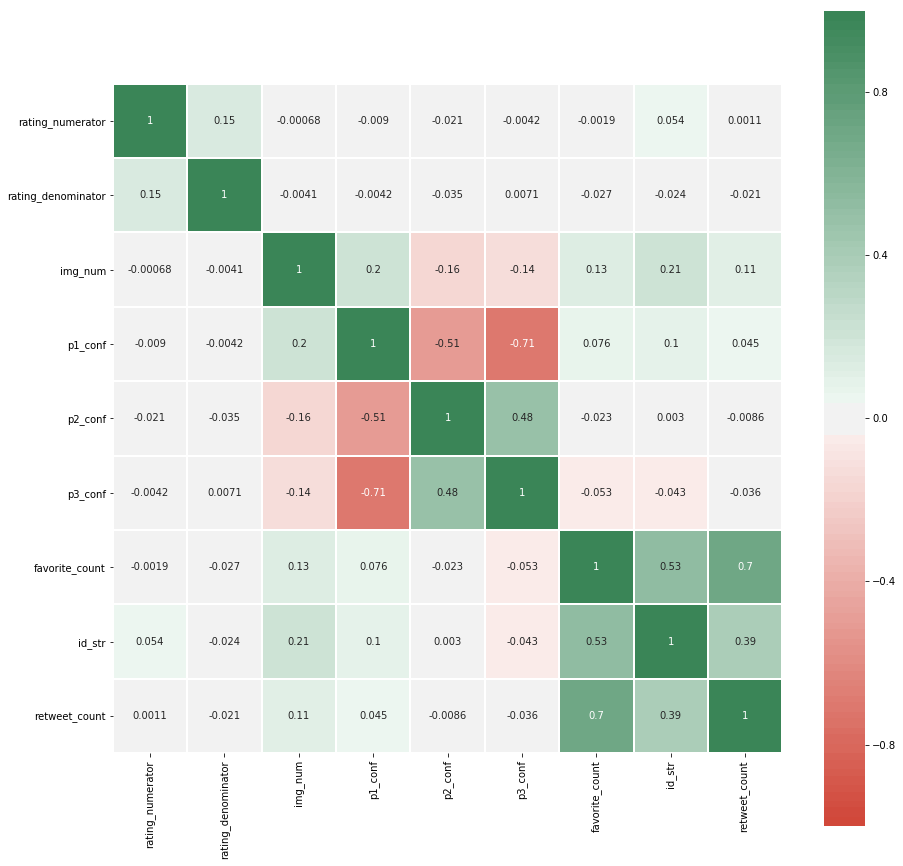

In [67]:
# Draw the correlation matrix
fig, axes = plt.subplots(figsize=(15, 15))
corr = df_clean_merge.corr()
axes = sns.heatmap(corr, annot=True, center=0, linewidths=1, square=True, cmap=sns.diverging_palette(15, 500, n = 100), vmin=-1, vmax=1)

<h5 style = "color: MidnightBlue ;font-weight: bold;" > Conclusion:
</h5>
<p style = "color: Teal " >

The same with p1_conf,p2_conf and p3_conf, p1_conf is positive
<br/>
    If p1_conf is correct, p2_conf and p3_conf will not correct
</p>

<h5 style = "color: MidnightBlue ;font-weight: bold;" > 2.  Compare number of dog
</h5>

In [68]:
#Create data frame from dog_stage.value_counts()
value_counts = df_clean_merge.dog_stage.value_counts()
value_counts = value_counts.reset_index()
value_counts.columns = ['DogStage', 'Value']
value_counts

,DogStage,Value
0,,1831
1,pupper,224
2,doggo,75
3,puppo,24
4,"doggo,pupper",10
5,floofer,9
6,"doggo,puppo",1
7,"doggo,floofer",1


In [69]:
#Remove row is null
value_counts = value_counts[value_counts.DogStage != '']
value_counts

,DogStage,Value
1,pupper,224
2,doggo,75
3,puppo,24
4,"doggo,pupper",10
5,floofer,9
6,"doggo,puppo",1
7,"doggo,floofer",1


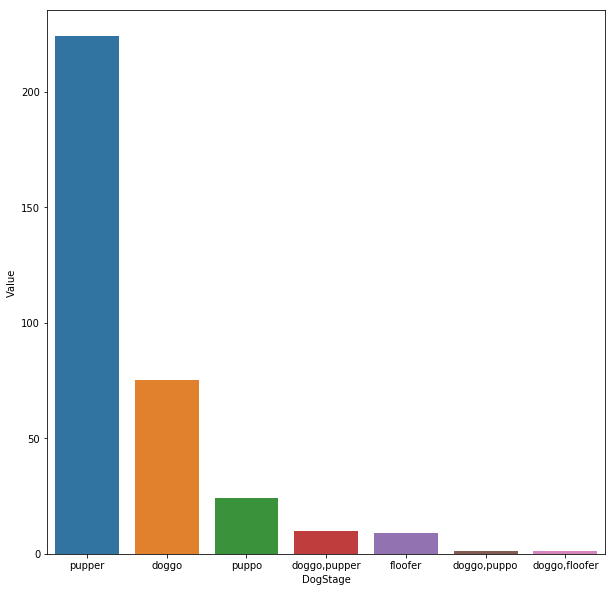

In [70]:
#create chart barplot using seaborn
fig, axes = plt.subplots(figsize=(10, 10))
axes = sns.barplot(data=value_counts, x="DogStage", y="Value")

<h5 style = "color: MidnightBlue ;font-weight: bold;" > 3.  Compare mean of dog
</h5>

In [71]:
#Create data frame from groupby(['dog_stage']).mean().rating_numerator
value_counts_mean_rat = df_clean_merge.groupby(['dog_stage']).mean().rating_numerator
value_counts_mean_rat = value_counts_mean_rat.reset_index()
value_counts_mean_rat.columns = ['DogStage', 'Value']
value_counts_mean_rat

,DogStage,Value
0,,13.600218
1,doggo,11.853333
2,"doggo,floofer",11.000000
3,"doggo,pupper",11.100000
4,"doggo,puppo",13.000000
5,floofer,11.888889
6,pupper,10.808036
7,puppo,12.041667


In [72]:
#Remove row is null
value_counts_mean_rat = value_counts_mean_rat[value_counts_mean_rat.DogStage != '']
value_counts_mean_rat

,DogStage,Value
1,doggo,11.853333
2,"doggo,floofer",11.000000
3,"doggo,pupper",11.100000
4,"doggo,puppo",13.000000
5,floofer,11.888889
6,pupper,10.808036
7,puppo,12.041667


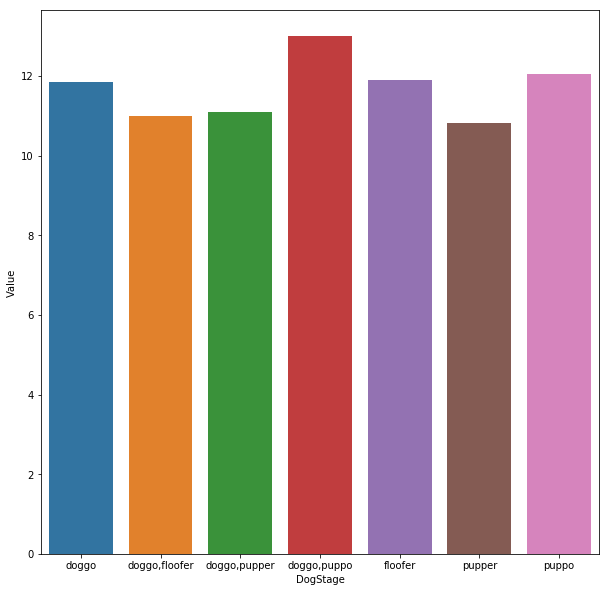

In [73]:
#create chart barplot using seaborn
fig, axes = plt.subplots(figsize=(10, 10))
axes = sns.barplot(data=value_counts_mean_rat, x="DogStage", y="Value")